In [1]:
import pandas as pd
import numpy as np
from datetime import timedelta, datetime
import os, sys,pickle
import time 
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import seaborn as sns

In [2]:
df_half_year = pd.read_pickle('/mnt/nfs/work1/jtaneja/jmugyenyi/REG_consumption_data/batched_data/combined_half_year_consumption.pck')

In [8]:
len(df_half_year)

154943

In [3]:
df_half_year.head() 

,meter_serial_number_consumer_id,mean_consumption_2_12,mean_consumption_1_13,mean_consumption_2_13,mean_consumption_1_14,mean_consumption_2_14,mean_consumption_1_15,mean_consumption_2_15,mean_consumption_1_16,mean_consumption_2_16,mean_consumption_1_17,mean_consumption_2_17,mean_consumption_1_18,mean_consumption_2_18,mean_consumption_1_19,mean_consumption_2_19
0,4206320410_151157,14.000000,15.100000,15.315476,12.276190,12.055769,13.664423,10.450,13.526190,13.423810,10.935714,12.730952,6.240000,6.934524,8.018571,10.140000
1,4206320428_154564,15.800000,34.250000,68.711111,60.472222,63.900000,54.512500,62.125,71.000000,59.166667,45.780000,42.549167,46.545833,31.848333,20.810000,16.083333
2,4206320436_119743,23.783333,33.716667,31.970833,22.165278,23.168056,24.296875,22.400,20.608333,20.050000,15.816667,12.183333,6.333333,23.416667,53.650000,84.416667
3,5000398650_24288,87.847619,116.926190,79.347619,108.909524,128.261905,130.185714,121.435,119.893333,105.504762,88.195238,92.566667,76.383333,72.433333,59.600000,NaN
4,5000399450_26002,59.366667,56.100000,60.461905,63.838095,82.326667,91.820000,47.300,30.533333,34.257143,37.776190,53.957143,52.411429,106.083333,90.650000,100.314286


In [4]:
df_half_year[df_half_year.meter_serial_number_consumer_id.isin(['7081283629_211489'])]

,meter_serial_number_consumer_id,mean_consumption_2_12,mean_consumption_1_13,mean_consumption_2_13,mean_consumption_1_14,mean_consumption_2_14,mean_consumption_1_15,mean_consumption_2_15,mean_consumption_1_16,mean_consumption_2_16,mean_consumption_1_17,mean_consumption_2_17,mean_consumption_1_18,mean_consumption_2_18,mean_consumption_1_19,mean_consumption_2_19
950,7081283629_211489,3.45,3.716667,4.016667,4.2,4.872222,6.683333,6.3625,14.40119,11.279365,14.581944,13.021591,22.389057,23.241852,20.843333,23.216667


In [12]:
# filter out rural or urban
# Meta file
meta_df = pd.read_pickle(
    '/mnt/nfs/work1/jtaneja/jmugyenyi/REG_consumption_data/metadata_folder/REG_metadata_March_3_2021.pck')
meta_df['meter_serial_number_consumer_id'] = meta_df['meter_serial_number'].astype(str) +'_'+ meta_df['consumer_id']
meta_df['installation_year'] = meta_df.installation_date.dt.year
meta_df = meta_df[['meter_serial_number_consumer_id','district']]
b = ['KIGALI']
rural = meta_df[meta_df.district.apply(lambda y: any(x not in b for x in y))]
# urban = meta_df[meta_df.district.apply(lambda y: any(x in b for x in y))]

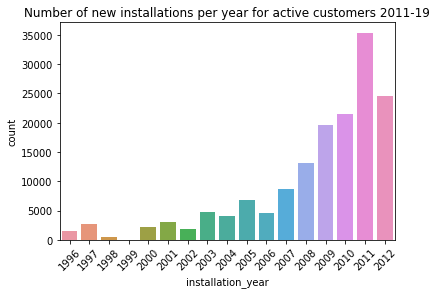

In [58]:
# # Frequency count for year of installation
# a = meta_df[meta_df.meter_serial_number_consumer_id.isin(df_half_year.meter_serial_number_consumer_id)]
# sns.countplot(x="installation_year",data=a)
# plt.xticks(rotation = 45)
# plt.title('Number of new installations per year for active customers 2011-19')
# plt.show()

In [13]:
# filter out rural or urban
# half year consumption file
df_half_year = df_half_year[df_half_year.meter_serial_number_consumer_id.isin(rural.meter_serial_number_consumer_id)]

In [4]:
df_half_year['mean_consumption_2_12'].describe()

count    154943.000000
mean         59.018637
std         271.285758
min           0.000000
25%          10.600000
50%          23.266667
75%          49.533333
max       29851.173333
Name: mean_consumption_2_12, dtype: float64

In [5]:
# select low and high threshold levels
low_df = df_half_year[df_half_year['mean_consumption_2_12']<10]
high_df = df_half_year[df_half_year['mean_consumption_2_12']>50]

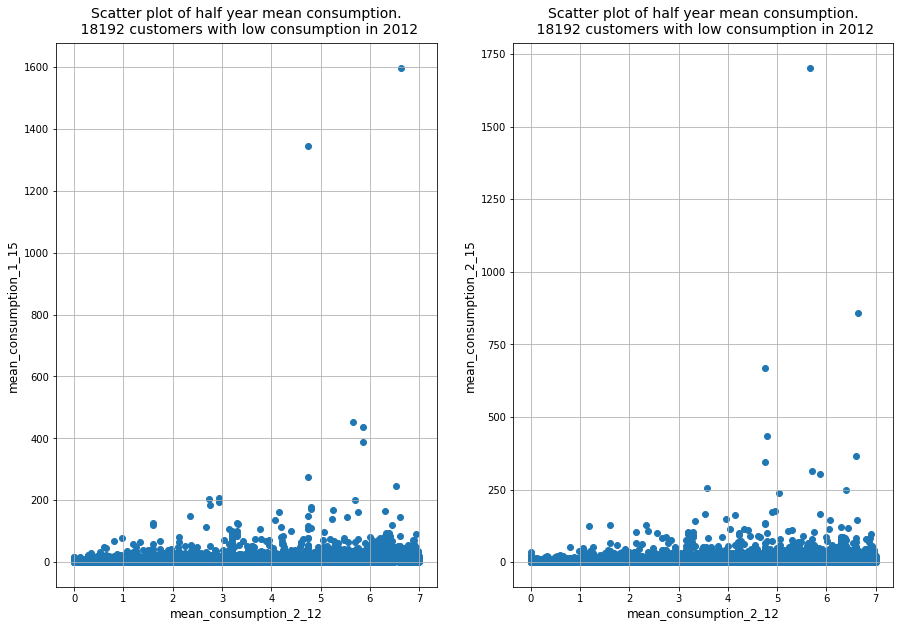

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,10))
ax[0].scatter(low_df['mean_consumption_2_12'],low_df['mean_consumption_1_15'])
ax[1].scatter(low_df['mean_consumption_2_12'],low_df['mean_consumption_2_16'])
title_font = {'size':'14', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'}
axis_font = {'size':'12'}
for i in range(0,2):
    ax[i].set_title(f'Scatter plot of half year mean consumption.\n {len(low_df)} customers with low consumption in 2012', **title_font)
    ax[i].set_xlabel('mean_consumption_2_12', **axis_font) 
    ax[i].grid(b=True, which='major')
ax[0].set_ylabel('mean_consumption_1_15', **axis_font)
ax[1].set_ylabel('mean_consumption_2_15', **axis_font)
plt.show()

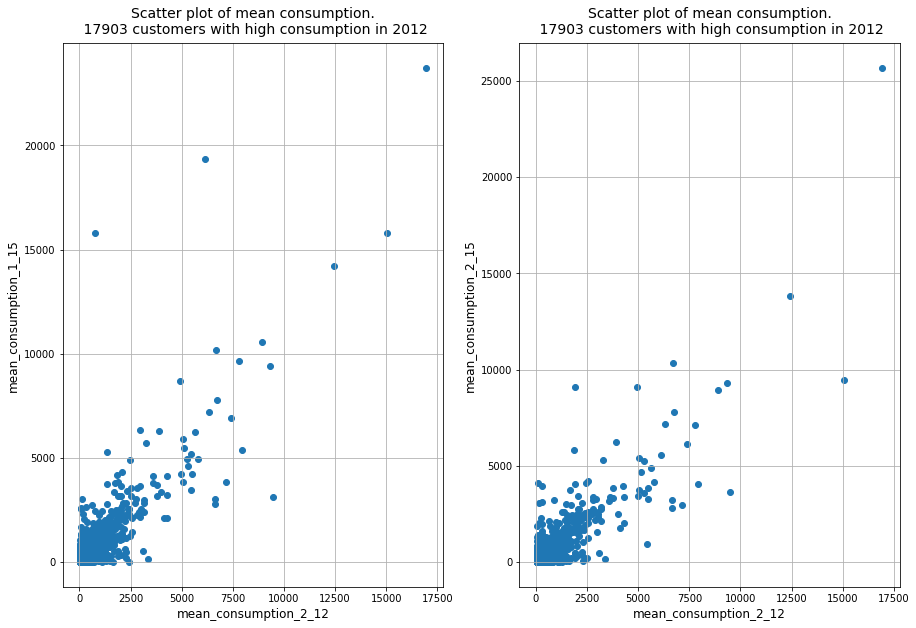

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,10))
ax[0].scatter(high_df['mean_consumption_2_12'],high_df['mean_consumption_1_15'])
ax[1].scatter(high_df['mean_consumption_2_12'],high_df['mean_consumption_2_15'])
title_font = {'size':'14', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'}
axis_font = {'size':'12'}
for i in range(0,2):
    ax[i].set_title(f'Scatter plot of mean consumption.\n {len(high_df)} customers with high consumption in 2012', **title_font)
    ax[i].set_xlabel('mean_consumption_2_12', **axis_font) 
    ax[i].grid(b=True, which='major')
ax[0].set_ylabel('mean_consumption_1_15', **axis_font)
ax[1].set_ylabel('mean_consumption_2_15', **axis_font)
plt.show()

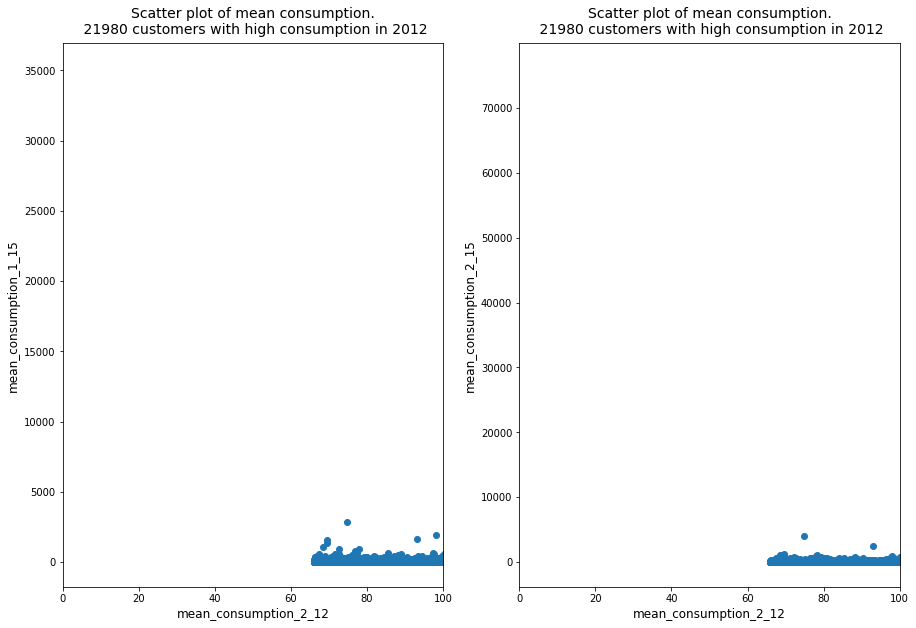

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,10))
ax[0].scatter(high_df['mean_consumption_2_12'],high_df['mean_consumption_1_15'])
ax[1].scatter(high_df['mean_consumption_2_12'],high_df['mean_consumption_2_15'])
title_font = {'size':'14', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'}
axis_font = {'size':'12'}
for i in range(0,2):
    ax[i].set_title(f'Scatter plot of mean consumption.\n {len(high_df)} customers with high consumption in 2012', **title_font)
    ax[i].set_xlabel('mean_consumption_2_12', **axis_font)  
    ax[i].set_xlim([0, 100])
ax[0].set_ylabel('mean_consumption_1_15', **axis_font)
ax[1].set_ylabel('mean_consumption_2_15', **axis_font)
plt.show()

In [49]:
high_df[high_df['mean_consumption_1_13']<2]

,meter_serial_number_consumer_id,mean_consumption_2_12,mean_consumption_1_13,mean_consumption_2_13,mean_consumption_1_14,mean_consumption_2_14,mean_consumption_1_15,mean_consumption_2_15,mean_consumption_1_16,mean_consumption_2_16,mean_consumption_1_17,mean_consumption_2_17,mean_consumption_1_18,mean_consumption_2_18,mean_consumption_1_19,mean_consumption_2_19
30987,7099976727_20120410 072529.203 0002025 7969,30.400000,1.533333,54.816667,28.077778,6.300000,12.658333,17.183333,17.455556,23.555556,24.472222,20.116667,23.283333,28.794444,18.422222,9.100000
68400,4214071195_20121006 105947.064 0002032 7615,150.800000,0.200000,29.250000,15.300000,6.300000,26.062500,27.420833,8.433333,NaN,29.122222,35.977778,31.516667,12.400000,32.533333,34.666667
69497,4214103295_20120529 110740.644 0002029 0240,79.694500,1.247182,1.402652,2.090000,1.587600,1.551375,1.649846,1.577936,1.419667,1.813600,2.146250,1.535200,2.146250,2.064000,2.494000
70460,4214129456_20120529 092134.743 0002029 2898,34.550000,1.140000,2.353846,4.705128,3.540000,4.337500,5.176923,4.995014,5.637037,6.618462,8.143590,7.157692,6.600000,7.183333,12.483333
119455,7076399653_20120112 101308.349 0002022 0471,36.285714,1.307143,NaN,0.600000,7.400000,5.079545,7.490909,4.200000,1.600000,0.700000,0.800000,0.700000,2.349231,3.442308,2.483333
120055,7076417232_236693,106.900000,1.600000,3.100000,4.725000,2.303333,10.480000,7.933333,8.535556,7.922222,11.047778,14.715556,12.180476,8.040635,7.138889,4.320000
144414,16400041907_106854,36.587179,1.938462,2.520000,2.940667,3.597795,3.068269,1.755769,2.500000,2.016667,2.091026,0.375641,0.737500,1.110000,1.100000,0.846154
149759,7100414155_20120910 101450.739 0002028 4360,44.929268,1.268293,0.731707,2.980488,5.611707,3.115641,4.148238,3.305589,3.048824,2.945180,4.034944,3.585116,2.764228,2.780488,1.814634
151927,7100586929_20120905 122216.352 0002035 0583,33.500000,1.000000,NaN,21.566667,10.275000,7.975000,8.062500,7.491667,7.483333,7.333333,7.866667,14.416667,11.033333,15.266667,12.820000


/home/jmugyenyi/miniconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


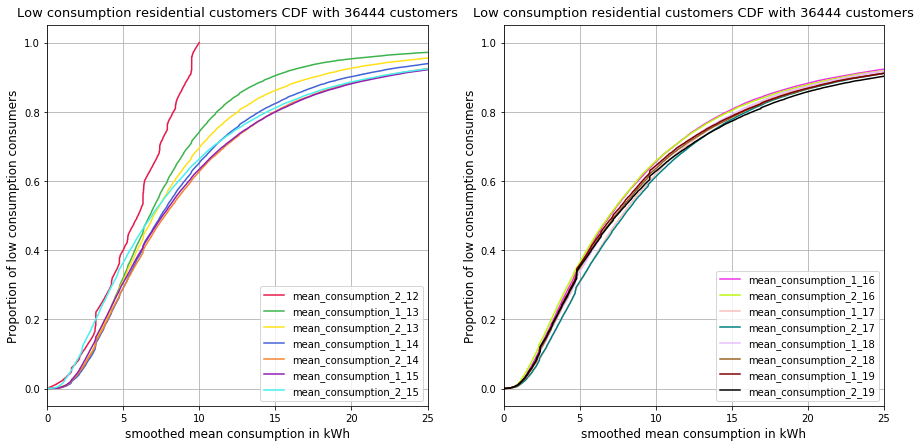

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
x = []
y = []
labels = ['mean_consumption_2_12',
          'mean_consumption_1_13','mean_consumption_2_13',
          'mean_consumption_1_14','mean_consumption_2_14',
          'mean_consumption_1_15','mean_consumption_2_15',
          'mean_consumption_1_16','mean_consumption_2_16',
          'mean_consumption_1_17','mean_consumption_2_17',
          'mean_consumption_1_18','mean_consumption_2_18',
          'mean_consumption_1_19','mean_consumption_2_19',
         ]
distinct_colors = [
    '#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231',
    '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe',
    '#008080', '#e6beff', '#9a6324', '#800000', '#000000', 
    '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080',
]
title_font = {'fontname':'DejaVu Sans', 'size':'13', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'}
axis_font = {'fontname':'DejaVu Sans', 'size':'12'}
for i in range(1, len(low_df.columns)):
    df0 = low_df.iloc[:,i]
    df0.dropna(inplace=True)
    T0=(df0.sort_values().value_counts())
    T0.sort_index(inplace=True)
    x0=T0.index
    y0=T0.cumsum()/len(df0)
    x.append(x0.tolist())
    y.append(y0.tolist())
for i in range(0, 7):
    ax[0].plot(x[i],y[i], label=labels[i], color=distinct_colors[i])
for i in range(7, 15):
    ax[1].plot(x[i],y[i], label=labels[i], color=distinct_colors[i])
for i in range(0,2):   
    ax[i].set_ylabel('Proportion of low consumption consumers', **axis_font)
    ax[i].set_xlabel('smoothed mean consumption in kWh', **axis_font)
    ax[i].set_title(f'Low consumption residential customers CDF with {len(low_df)} customers', **title_font)
    ax[i].set_xlim([0, 25])
    ax[i].grid(b=True, which='major')
    ax[i].legend(fontsize=10)
# for i in range(0, 15):
#     ax.plot(x[i],y[i], label=labels[i])
# ax.set_xlim([0, 30])
# ax.set_ylim([0, 1])
# ax.legend(fontsize=10)
# ax.grid(b=True, which='major')
# plt.show()

/home/jmugyenyi/miniconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


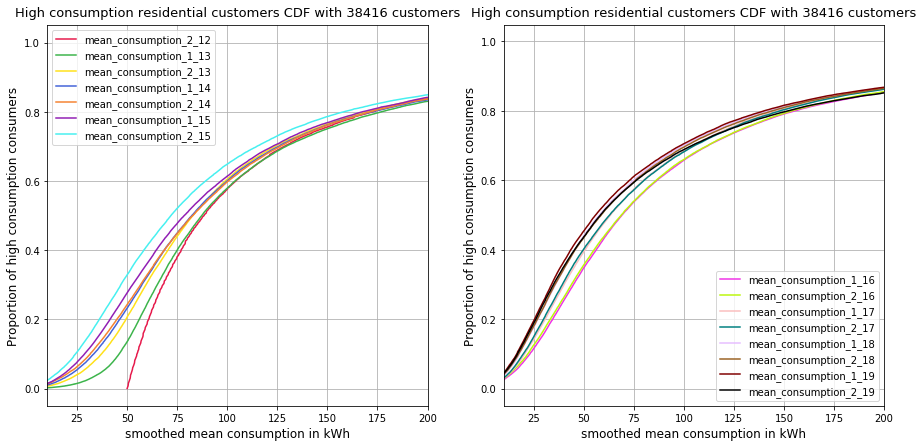

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
x = []
y = []
labels = ['mean_consumption_2_12',
          'mean_consumption_1_13','mean_consumption_2_13',
          'mean_consumption_1_14','mean_consumption_2_14',
          'mean_consumption_1_15','mean_consumption_2_15',
          'mean_consumption_1_16','mean_consumption_2_16',
          'mean_consumption_1_17','mean_consumption_2_17',
          'mean_consumption_1_18','mean_consumption_2_18',
          'mean_consumption_1_19','mean_consumption_2_19',
         ]
distinct_colors = [
    '#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231',
    '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe',
    '#008080', '#e6beff', '#9a6324', '#800000', '#000000', 
    '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080',
]
title_font = {'fontname':'DejaVu Sans', 'size':'13', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'}
axis_font = {'fontname':'DejaVu Sans', 'size':'12'}
for i in range(1, len(high_df.columns)):
    df0 = high_df.iloc[:,i]
#     df0.dropna(inplace=True)
    T0=(df0.sort_values().value_counts())
    T0.sort_index(inplace=True)
    x0=T0.index
    y0=T0.cumsum()/len(df0)
    x.append(x0.tolist())
    y.append(y0.tolist())
for i in range(0, 7):
    ax[0].plot(x[i],y[i], label=labels[i], color=distinct_colors[i])
for i in range(7, 15):
    ax[1].plot(x[i],y[i], label=labels[i], color=distinct_colors[i])
for i in range(0,2):   
    ax[i].set_ylabel('Proportion of high consumption consumers', **axis_font)
    ax[i].set_xlabel('smoothed mean consumption in kWh', **axis_font)
    ax[i].set_title(f'High consumption residential customers CDF with {len(high_df)} customers', **title_font)
    ax[i].set_xlim([10, 200])
    ax[i].grid(b=True, which='major')
    ax[i].legend(fontsize=10)
plt.show()

In [15]:
## Creating HeatMap
# Kigali
# bn_1_1 = 17
# bn_2_1 = 34
# bn_3_1 = 66
# Other districts
bn_1_1 = 7
bn_2_1 = 14
bn_3_1 = 28
# Combined
# bn_1_1 = 10
# bn_2_1 = 20
# bn_3_1 = 50
labels = [f'0-{bn_1_1}',f'{bn_1_1}-{bn_2_1}',f'{bn_2_1}-{bn_3_1}',f'{bn_3_1}+']
mean_by_year = ['mean_consumption_2_12',
                'mean_consumption_1_13','mean_consumption_2_13',
                'mean_consumption_1_14','mean_consumption_2_14',
                'mean_consumption_1_15','mean_consumption_2_15',
                'mean_consumption_1_16','mean_consumption_2_16',
                'mean_consumption_1_17','mean_consumption_2_17',
                'mean_consumption_1_18','mean_consumption_2_18',
                'mean_consumption_1_19','mean_consumption_2_19'
               ]


In [16]:
# compute bins for HeatMap
x_year = 0 # select year for x axis
y_year = 5 # select year for y axis
x_list = []
y_list = []
x_labels_with_size = []

x_bins = [df_half_year[mean_by_year[x_year]]<bn_1_1, 
         (df_half_year[mean_by_year[x_year]]>=bn_1_1) & (df_half_year[mean_by_year[x_year]]<bn_2_1), 
         (df_half_year[mean_by_year[x_year]]>=bn_2_1) & (df_half_year[mean_by_year[x_year]]<bn_3_1),
         df_half_year[mean_by_year[x_year]]>=bn_3_1]
y_bins = [df_half_year[mean_by_year[y_year]]<bn_1_1, 
         (df_half_year[mean_by_year[y_year]]>=bn_1_1) & (df_half_year[mean_by_year[y_year]]<bn_2_1), 
         (df_half_year[mean_by_year[y_year]]>=bn_2_1) & (df_half_year[mean_by_year[y_year]]<bn_3_1),
         df_half_year[mean_by_year[y_year]]>=bn_3_1]
for i in range(0,4):
    x = df_half_year[x_bins[i]][['meter_serial_number_consumer_id',mean_by_year[x_year]]]
    for j in range(0,4):
        y = df_half_year[y_bins[j]][['meter_serial_number_consumer_id',mean_by_year[y_year]]]
        perct = len(x[x.meter_serial_number_consumer_id.isin(y.meter_serial_number_consumer_id)])/len(x)
        y_list.append(round(perct*100,1))
    x_list.append(y_list)
    y_list = []


print(f'base year: {mean_by_year[x_year]}')
print(f'comparison year: {mean_by_year[y_year]}')

base year: mean_consumption_2_12
comparison year: mean_consumption_1_15


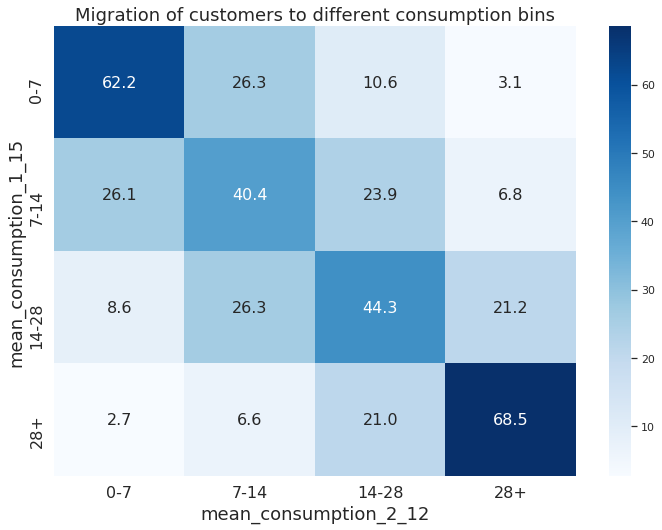

In [17]:
# Plot HeatMap
sns.set(rc={'figure.figsize':(11.7,8.27)})
x_list_inverted = [list(x) for x in zip(*x_list)]
res = sns.heatmap(x_list_inverted,cmap="Blues", annot=True, 
            xticklabels=labels, yticklabels=labels,
            fmt=".1f", annot_kws={'size':16})
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 16)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16)
plt.xlabel(f'{mean_by_year[x_year]}',fontsize=18)
plt.ylabel(f'{mean_by_year[y_year]}', fontsize=18)
plt.title('Migration of customers to different consumption bins', fontsize=18)
plt.show()

In [40]:
# no growth low consumers
x_year = 0 # select year for x axis
y_year = 5 # select year for y axis
x = df_half_year[x_bins[0]][['meter_serial_number_consumer_id',mean_by_year[x_year]]]
y = df_half_year[y_bins[0]][['meter_serial_number_consumer_id',mean_by_year[y_year]]]
no_grow_low_cons = (x[x.meter_serial_number_consumer_id.isin(y.meter_serial_number_consumer_id)])

In [41]:
# no loss high consumers
x_year = 0 # select year for x axis
y_year = 5 # select year for y axis
x = df_half_year[x_bins[1]][['meter_serial_number_consumer_id',mean_by_year[x_year]]]
y = df_half_year[y_bins[1]][['meter_serial_number_consumer_id',mean_by_year[y_year]]]
no_loss_high_cons = (x[x.meter_serial_number_consumer_id.isin(y.meter_serial_number_consumer_id)])

In [42]:
len(x[x.meter_serial_number_consumer_id.isin(y.meter_serial_number_consumer_id)])/len(x)

0.4614967216821162

In [18]:
x_year = 0 # select year for x axis
y_year = 8 # select year for y axis
x_list = []
y_list = []

for i in range(0,4):
    x = df_half_year[x_bins[i]][['meter_serial_number_consumer_id',mean_by_year[0]]]
    y = df_half_year[y_bins[i]][['meter_serial_number_consumer_id',mean_by_year[5]]]
    tmp = (x[x.meter_serial_number_consumer_id.isin(y.meter_serial_number_consumer_id)])
    no_change_df = df_half_year[df_half_year.meter_serial_number_consumer_id.isin(tmp.meter_serial_number_consumer_id)]
    
    x_bins_no_change = [no_change_df[mean_by_year[x_year]]<bn_1_1, 
         (no_change_df[mean_by_year[x_year]]>=bn_1_1) & (no_change_df[mean_by_year[x_year]]<bn_2_1), 
         (no_change_df[mean_by_year[x_year]]>=bn_2_1) & (no_change_df[mean_by_year[x_year]]<bn_3_1),
         no_change_df[mean_by_year[x_year]]>=bn_3_1]
    y_bins_no_change = [no_change_df[mean_by_year[y_year]]<bn_1_1, 
             (no_change_df[mean_by_year[y_year]]>=bn_1_1) & (no_change_df[mean_by_year[y_year]]<bn_2_1), 
             (no_change_df[mean_by_year[y_year]]>=bn_2_1) & (no_change_df[mean_by_year[y_year]]<bn_3_1),
             no_change_df[mean_by_year[y_year]]>=bn_3_1]

    for j in range(0,4):
        y = no_change_df[y_bins_no_change[j]][['meter_serial_number_consumer_id','mean_consumption_2_12',mean_by_year[y_year]]]
        perct = len(no_change_df[no_change_df.meter_serial_number_consumer_id.isin(y.meter_serial_number_consumer_id)])/len(no_change_df)
        y_list.append(round(perct*100,1))
    x_list.append(y_list)
    y_list = []
    x_list_transposed = list(map(list, zip(*x_list)))

print(f'base year: {mean_by_year[x_year]}')
print(f'comparison year: {mean_by_year[y_year]}')

base year: mean_consumption_2_12
comparison year: mean_consumption_2_16


In [49]:
x_list_transposed

[[80.8, 22.4, 4.4, 1.2],
 [15.7, 58.1, 25.3, 3.5],
 [2.4, 17.4, 57.5, 13.9],
 [0.6, 1.8, 12.7, 81.2]]

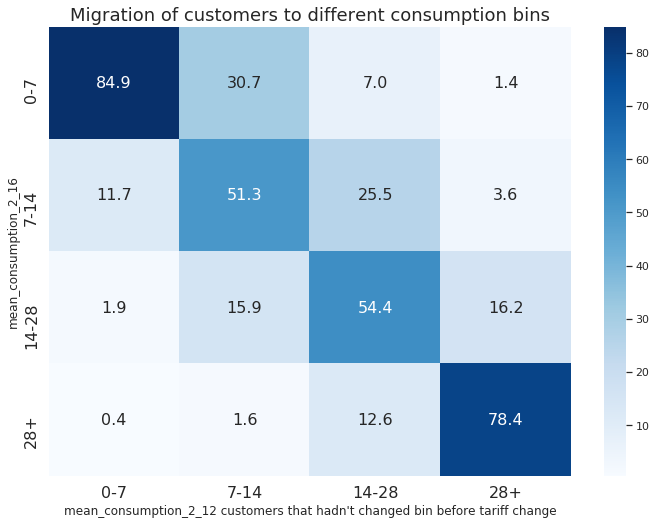

In [19]:
# Plot histogram of customers with no growth before tariff change
sns.set(rc={'figure.figsize':(11.7,8.27)})
res = sns.heatmap(x_list_transposed,cmap="Blues", annot=True, 
            xticklabels=labels, yticklabels=labels,
            fmt=".1f", annot_kws={'size':16})
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 16)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16)
plt.xlabel(f'{mean_by_year[x_year]} customers that hadn\'t changed bin before tariff change',fontsize=12)
plt.ylabel(f'{mean_by_year[y_year]}', fontsize=12)
plt.title('Migration of customers to different consumption bins', fontsize=18)
plt.show()

In [17]:
no_loss_high_cons

,meter_serial_number_consumer_id,mean_consumption_2_12
259,5000534064_22238,11.500000
477,5000580653_92713,9.500000
600,7081275351_89016,11.600000
615,7081275633_218650,7.575000
626,7081275815_74895,11.791667
...,...,...
154702,7101358013_20120409 110141.524 0002025 0081,13.988095
154719,7101359193_20120410 074139.566 0002025 1212,11.979167
154725,7101359706_20120416 075101.346 0002025 1052,8.666667
154786,30590000631_252322,9.100000


## delete


In [39]:
y#.meter_serial_number_consumer_id.tolist()

,meter_serial_number_consumer_id,mean_consumption_2_12,mean_consumption_2_16
648,7081276458_211208,6.300000,9.170833
732,7081278587_214786,5.566667,7.166346
760,7081278967_211453,5.168750,10.030556
915,7081282308_20111221 120407.790 0002025 0108,4.587500,11.637619
950,7081283629_211489,3.450000,11.279365
...,...,...,...
154587,7101255292_20120430 145836.190 0002025 1866,4.877778,7.460774
154621,7101326382_20120402 135734.527 0002027 1955,3.800000,11.703175
154659,7101329881_20120502 133238.098 0002035 0938,3.138462,8.910490
154713,7101358922_20120426 103225.165 0002025 7632,1.900000,7.652727


In [26]:
no_change_df

,meter_serial_number_consumer_id,mean_consumption_2_12,mean_consumption_1_13,mean_consumption_2_13,mean_consumption_1_14,mean_consumption_2_14,mean_consumption_1_15,mean_consumption_2_15,mean_consumption_1_16,mean_consumption_2_16,mean_consumption_1_17,mean_consumption_2_17,mean_consumption_1_18,mean_consumption_2_18,mean_consumption_1_19,mean_consumption_2_19
169,5000516590_178532,1.659259,2.981466,2.714143,3.537739,3.016744,2.659704,1.392763,1.511550,1.872393,3.603947,4.184649,3.067368,2.875000,3.301846,4.467429
549,7081274495_216711,1.230159,3.631746,3.120000,3.120000,5.100000,5.666071,2.065079,3.603175,2.605291,2.511640,1.637390,2.255996,1.921709,2.276564,3.332937
571,7081274917_221127,2.507843,6.129412,4.950000,3.379167,4.054167,5.285000,3.970278,4.163624,4.485994,10.606863,13.897619,13.669048,13.485714,10.664286,7.504762
593,7081275252_224694,3.200000,5.266667,6.300000,3.566667,4.794444,5.825000,4.200000,4.983333,6.133333,14.716667,8.825000,16.191667,8.733333,4.425000,3.840000
639,7081275997_229287,3.135000,4.447500,2.989375,3.943109,5.343558,4.423750,3.839514,4.101552,3.307027,5.200000,5.343750,5.145833,8.500000,4.314000,8.671667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154844,4226783696_20121228 103951.743 0002023 7461,1.066667,11.231046,8.364510,4.971333,7.505333,4.972500,2.860000,3.746667,3.982000,7.914667,8.170000,6.483333,6.116667,3.040000,4.800000
154866,4226785329_174463,0.290909,5.251515,4.775000,7.743333,2.560000,2.133333,5.323333,8.566538,6.755128,8.412500,5.005000,2.640833,3.691000,3.600000,3.280000
154890,4226807388_20120110 150136.870 0002029 2899,1.400000,9.444444,13.762222,9.386667,11.623333,5.100000,2.300000,2.300000,4.625000,5.020000,6.066667,3.050000,3.880000,3.666667,5.080000
154921,4226809848_205784,3.200000,7.252632,4.967065,6.141414,5.829240,5.808271,4.700000,2.300000,1.840000,3.349474,4.208173,5.018627,3.257018,4.378947,8.220000


In [6]:
# Meta file
meta_df = pd.read_pickle(
    '/mnt/nfs/work1/jtaneja/jmugyenyi/REG_consumption_data/metadata_folder/REG_metadata_March_3_2021.pck')
meta_df['meter_serial_number_consumer_id'] = meta_df['meter_serial_number'].astype(str) +'_'+ meta_df['consumer_id']
meta_df = meta_df[['meter_serial_number_consumer_id','district']]
b = ['KIGALI']
rural = meta_df[meta_df.district.apply(lambda y: any(x not in b for x in y))]

In [21]:
b = ['KIGALI']
rural = meta_df[meta_df.district.apply(lambda y: any(x not in b for x in y))]

In [19]:
meta_df[meta_df.district.str.len()>1]

,meter_serial_number_consumer_id,district
110,4183145244_100092,"[KIGALI, RULINDO]"
112,4183146341_100093,"[KIGALI, RULINDO]"
127,14102712339_100102,"[KIGALI, RULINDO]"
128,4183146390_100103,"[KIGALI, RULINDO]"
130,4200562496_100105,"[KIGALI, RULINDO]"
...,...,...
811052,4185418672_99585,"[KIGALI, RULINDO]"
811057,4184238725_99588,"[KIGALI, RULINDO]"
811061,4185417393_99591,"[KIGALI, RULINDO]"
811339,4184248211_99824,"[KIGALI, RULINDO]"


In [ ]:
first_bin =  {}
second_bin = {}
third_bin =  {}
fourth_bin = {}

for i in mean_by_year:
    first_bin[i] = (round(len(df_half_year[df_half_year[i]<bn_1_1])/(len(df_half_year))*100,1))
    second_bin[i] = (round(len(df_half_year[(df_half_year[i]>=bn_1_1) & 
                                      (df_half_year[i]<bn_2_1)])/(len(df_half_year))*100,1))
    third_bin[i] = (round(len(df_half_year[(df_half_year[i]>=bn_2_1) & 
                                      (df_half_year[i]<bn_3_1)])/(len(df_half_year))*100,1))
    fourth_bin[i] = (round(len(df_half_year[df_half_year[i]>=bn_3_1])/(len(df_half_year))*100,1))
    
heat_map_df = pd.DataFrame(index=labels,columns= mean_by_year)
heat_map_df.loc[labels[0]]  = list(first_bin.values())
heat_map_df.loc[labels[1]]  = list(second_bin.values())
heat_map_df.loc[labels[2]]  = list(third_bin.values())
heat_map_df.loc[labels[3]]  = list(fourth_bin.values())